# Assignment 2 
* Author: **Vinay Reddy**
* NetID: **vrv22001**
* Date: **01/25/2023**

Here is a blank notebook for Assignment 2. Please fill in your name and NetID at the top. This assignment is designed to introduce you to how to use R with Google Colab. After finishing all your answers, please click "Runtime-> Run all" (or Ctrl+F9) to generate all the outputs and submit your ipynb file with all the outputs.

In [ ]:
version # make sure it says language R at the bottom!

               _                                          
platform       x86_64-pc-linux-gnu                        
arch           x86_64                                     
os             linux-gnu                                  
system         x86_64, linux-gnu                          
status         Patched                                    
major          4                                          
minor          2.2                                        
year           2022                                       
month          11                                         
day            10                                         
svn rev        83330                                      
language       R                                          
version.string R version 4.2.2 Patched (2022-11-10 r83330)
nickname       Innocent and Trusting                      

# General Instructions

Please change the file name to “Assignment 2 Solution.ipynb.” The solution to each problem should be a separate section. 

Note that R code submitted should work independent of the data that
sits in the data structure. For example, suppose there was a vector
$Rvec$ with the values $(1,1,4)$ and the problem asks for you to
create R code to create a vector answer which doubles each element
of $Rvec$. 


*   The answer $answer=c(2,2,8)$ would be given no credit.

*  The answer $answer=2*Rvec$ would be an appropriate answer. 

For all problems, be sure to add comments that will enable the graders
to understand your process, as needed. If you have any questions,
please submit them via email to the instructor and/or the graders
prior to submitting your solution. 

# Problem 1 (30 Points)
By default, R provides several packages that are downloaded and loaded. One data set is called `women`, which is a data frame and is available in the `datasets` package of R, i.e., it is automatically
available.

a. How many variables are in this data frame? What does each variable represent? Don’t forget to include units. Hint: check the documentation for the units 

https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html


In [2]:
str(women)
summary(women)
#height	numeric	Height (in)
#weight	numeric	Weight (lbs)
print("There are 2 variables in women dataframe and each variable represents height in (inches) and weight in (lbs).")

'data.frame':	15 obs. of  2 variables:
 $ height: num  58 59 60 61 62 63 64 65 66 67 ...
 $ weight: num  115 117 120 123 126 129 132 135 139 142 ...


     height         weight     
 Min.   :58.0   Min.   :115.0  
 1st Qu.:61.5   1st Qu.:124.5  
 Median :65.0   Median :135.0  
 Mean   :65.0   Mean   :136.7  
 3rd Qu.:68.5   3rd Qu.:148.0  
 Max.   :72.0   Max.   :164.0  

[1] "There are 2 variables in women dataframe and each variable represents height in (inches) and weight in (lbs)."


b. Calculate the body mass index $$\text{BMI}= \frac{\text{weight(lbs)} * 703}{\text{height(inches)}^2}$$ for every observation and create a variable BMI which records the output.



In [3]:
weight = c(women$weight)

height = c(women$height)

BMI = (weight*703)/(height^2)
print(BMI)


 [1] 24.03240 23.62856 23.43333 23.23811 23.04318 22.84883 22.65527 22.46272
 [9] 22.43274 22.23791 22.19680 22.14871 22.09429 22.17358 22.23997


c. In R, You can add a vector x that you want to name ```name``` to a dataframe ```df``` by writing

```r
df["name"] = x
```

Add the BMI to `women` with an appropriate column name. 

In [4]:

women$BMI = with(women, women$weight*703/(women$height^2))
print(women)


   height weight      BMI
1      58    115 24.03240
2      59    117 23.62856
3      60    120 23.43333
4      61    123 23.23811
5      62    126 23.04318
6      63    129 22.84883
7      64    132 22.65527
8      65    135 22.46272
9      66    139 22.43274
10     67    142 22.23791
11     68    146 22.19680
12     69    150 22.14871
13     70    154 22.09429
14     71    159 22.17358
15     72    164 22.23997


d. Calculate the arithmetic mean and sample standard deviation of ```BMI```, without using any package or functions, except for sum() and length(), together with standard mathematical operators.

In [5]:
sum=0
length=0
for (i in women$BMI){
  sum = sum+i
  length = length+1
}

mean=sum/length
print(paste("Mean: ", (mean)))

sum1=0
for (i in women$BMI){
  sum1 = sum1+((mean-i)^2 / (length-1) )  
}
sd=(sqrt(sum1))
print(paste("Standard Deviation: ", (sd)))


[1] "Mean:  22.7244264440729"
[1] "Standard Deviation:  0.618283905796862"


e. Is the distribution of ```BMI``` skewed? If so, in what direction? Explain.

In [ ]:
# Use the package moments to get the skewness
# https://cran.r-project.org/web/packages/
install.packages("moments")
library(moments)

skewness(women$BMI)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.7744968

# Problem 2 (35 points)
In this problem we will be constructing a histogram of the ```hr``` vector for the ```heart.rate``` data set in the ```ISwR``` package.

a. The basic command for creating a histogram is ```hist(x)```, where x is a vector of numerical values. Create a histogram of the ```hr``` vector where hr denotes heart rate.


'data.frame':	36 obs. of  3 variables:
 $ hr  : num  96 110 89 95 128 100 72 79 100 92 ...
 $ subj: Factor w/ 9 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ time: Factor w/ 4 levels "0","30","60",..: 1 1 1 1 1 1 1 1 1 2 ...


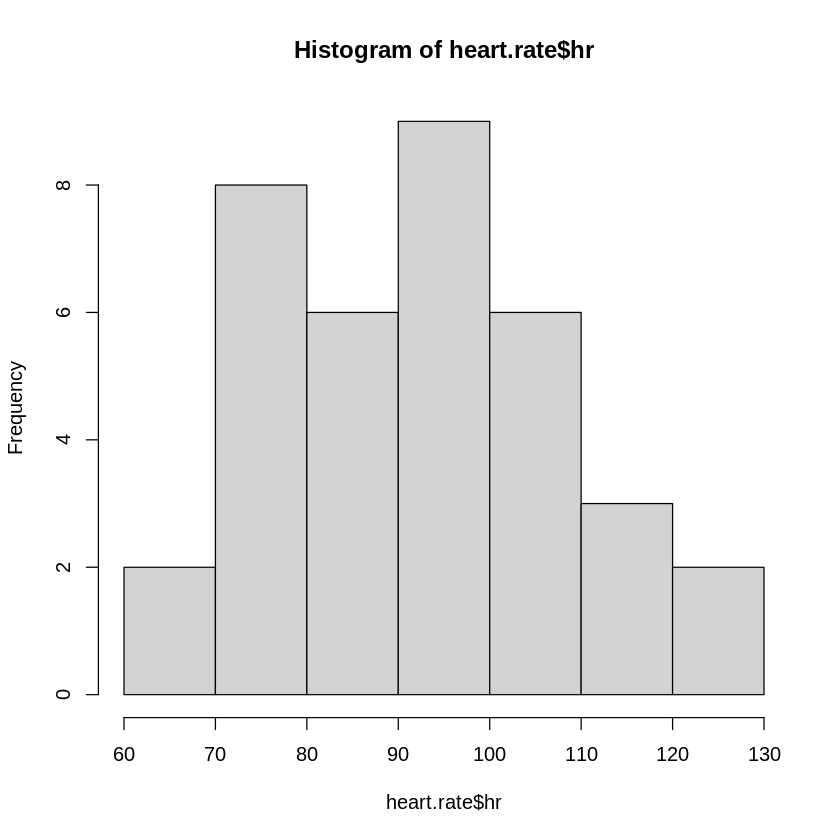

In [ ]:
#install.packages("ISwR")
#library("ISwR") 
str(heart.rate)
hist(heart.rate$hr)

b. ```R``` automatically calculates where breaks should be a histogram. It is often the case that the user wants to specify exactly where the breaks should be. To make your own breaks, create a vector called ```DesiredBreaks``` of length 6 where the first element is 50, the last element is 130, and the internal elements are equally spaced between successive values. Add another argument to the histogram command which is called breaks and set it equal to ```DesiredBreaks```. This should change the histogram to having 5 sections. Note that you can create that array either by calculating the breakpoints by hand, or you can explore the function ```seq```.


[1]  50  66  82  98 114 130


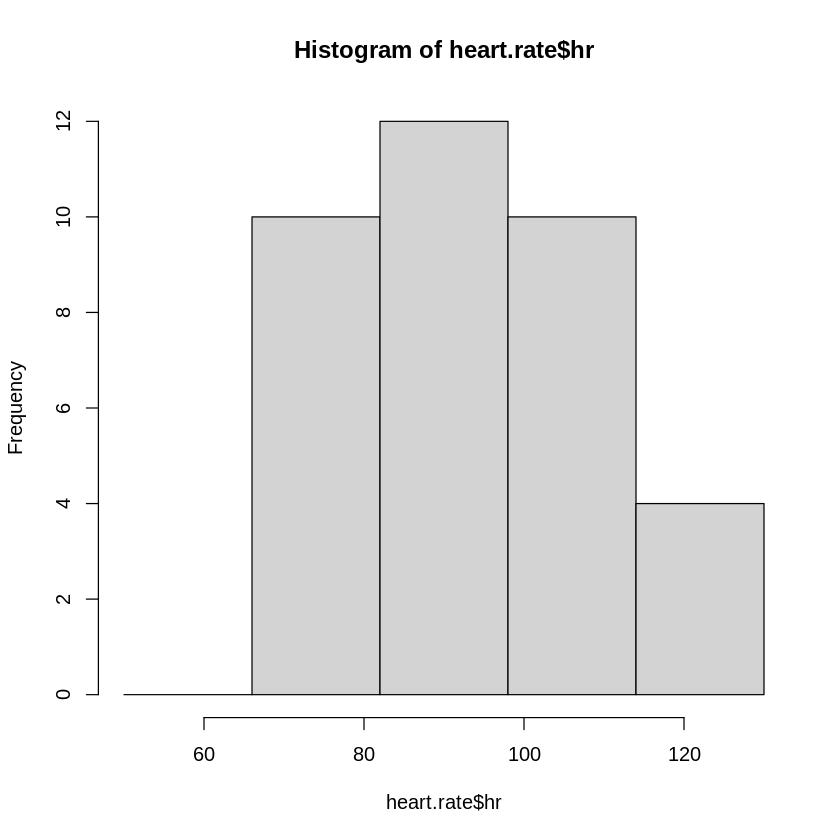

In [ ]:
 DesiredBreaks = seq(50,130,length = 6)
 breaks = DesiredBreaks
 print(DesiredBreaks)
 hist(heart.rate$hr, breaks)
 #DesiredBreak <- (50,66,82,98,114,130) # calculating breakpoints by hand

c. Building on the chart from the previous subproblem, add a title called “Heart Rate Histogram” by setting the main argument, and regenerate the plot.

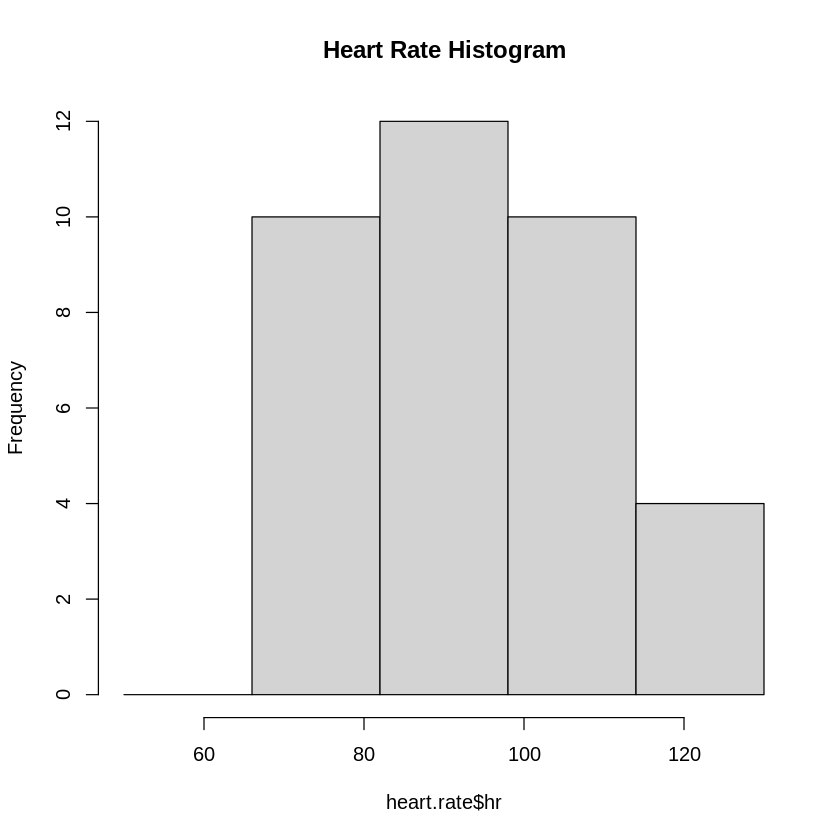

In [ ]:
hist(heart.rate$hr,breaks, main="Heart Rate Histogram")

d. Building on the chart from the previous subproblem, add descriptive x-label text, by setting the xlab argument. The xlab argument should be set to “Heart Rate”.

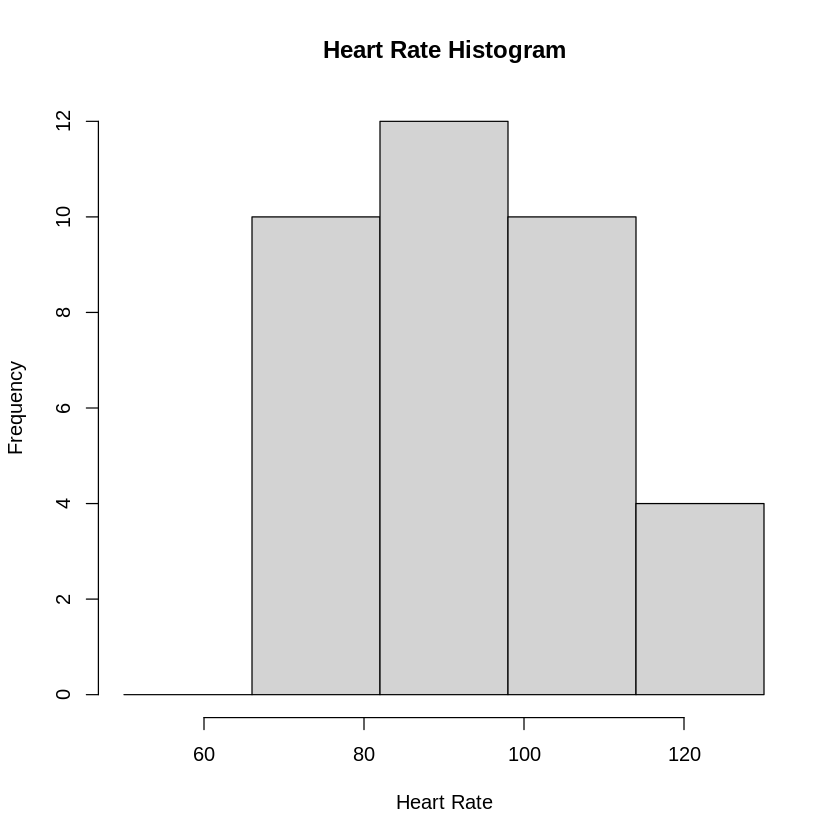

In [ ]:
hist(heart.rate$hr,breaks, main="Heart Rate Histogram", xlab="Heart Rate")

e. Building on the chart from the previous subproblem, add color to the graph by setting the col argument to ”red”.

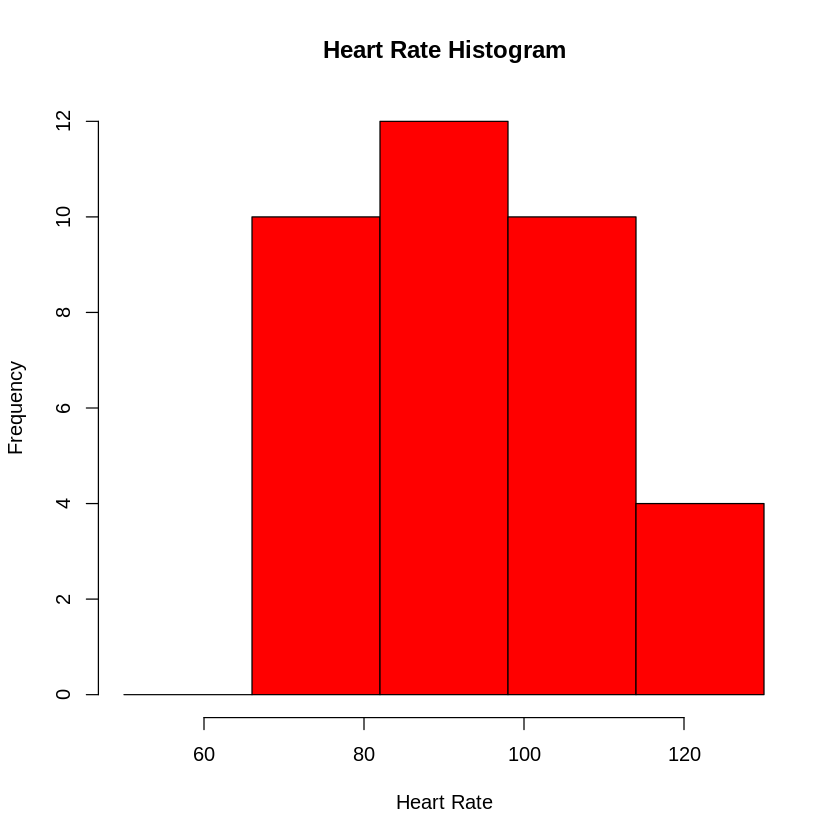

In [ ]:
hist(heart.rate$hr,breaks, main="Heart Rate Histogram", xlab="Heart Rate", col="red")

f. Colors in histograms can also be set by specifying the color for each bar. Create a vector called ```DesiredColors```, and set it to the 7 colors of your choice, specified by textual name.
You can search for the names of colors that R accepts, or access this link:

http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

Building on the chart from the previous subproblem, change the col argument to the vector ```DesiredColors```.

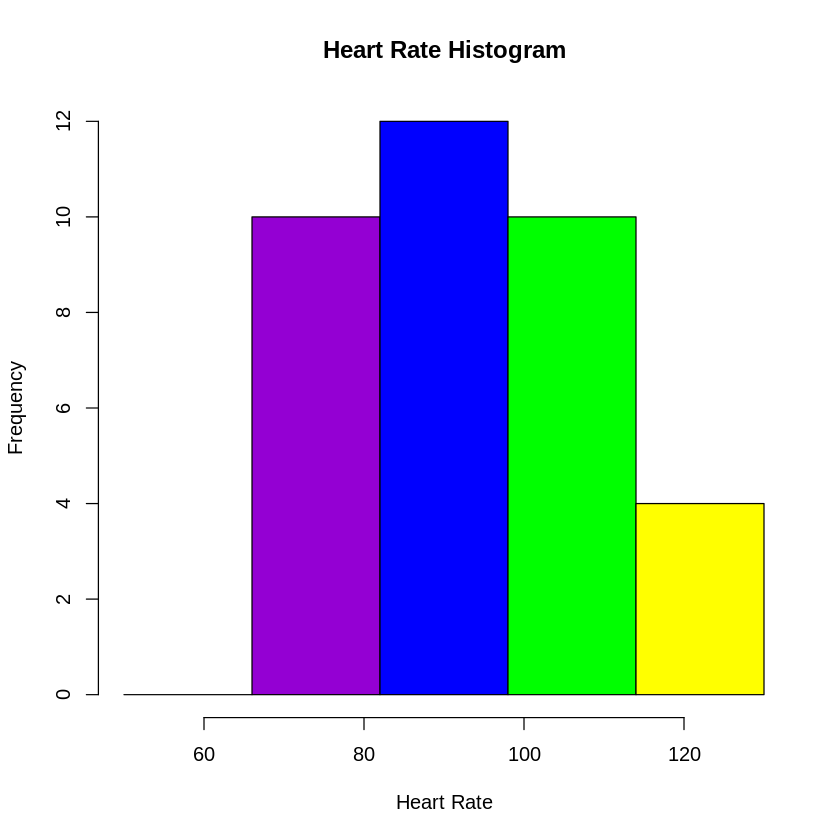

In [ ]:
DesiredColors = c("violet","dark violet","blue","green","yellow","orange","red")
hist(heart.rate$hr,breaks, main="Heart Rate Histogram", xlab="Heart Rate", col=DesiredColors)

g. It can be cumbersome to list each color by name. Alternatively, you can create a vector of integer values, and R will automatically pick colors for you. Replace the contents of ```DesiredColors``` you created in the previous subproblem by a vector containing values 1, 2, 3, 4, 5, and regenerate the plot.

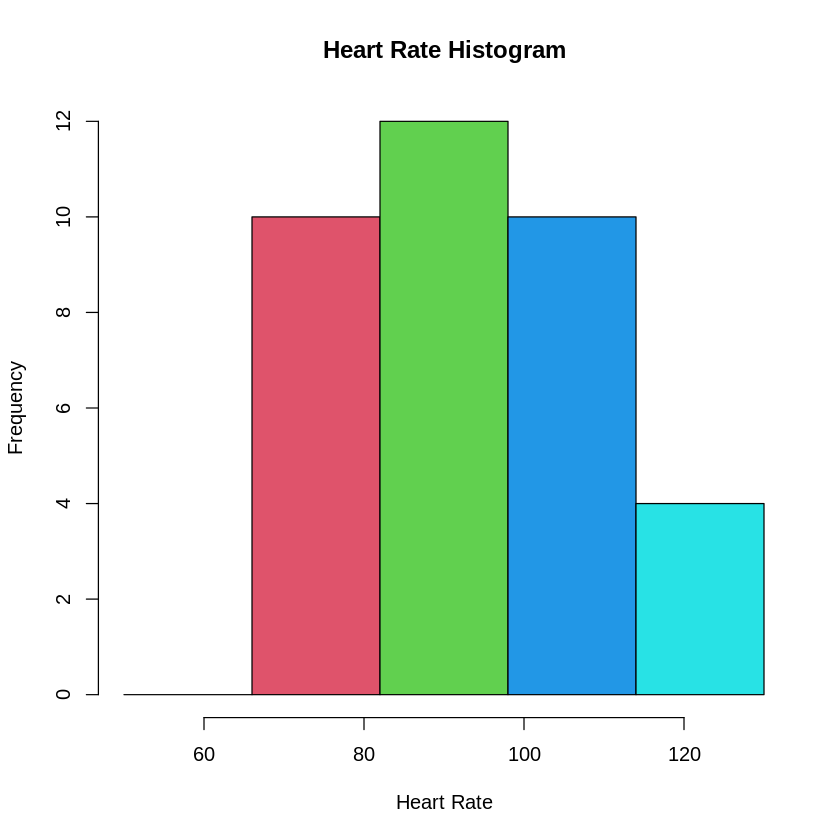

In [ ]:
DesiredColors = c(1,2,3,4,5)
hist(heart.rate$hr,breaks, main="Heart Rate Histogram", xlab="Heart Rate", col=DesiredColors)

h. As we discussed in class, a histogram can either be a frequency or density histogram. The argument that sets this is call ```freq```, which by default is set to TRUE. Change this argument to FALSE, and regenerate the plot.

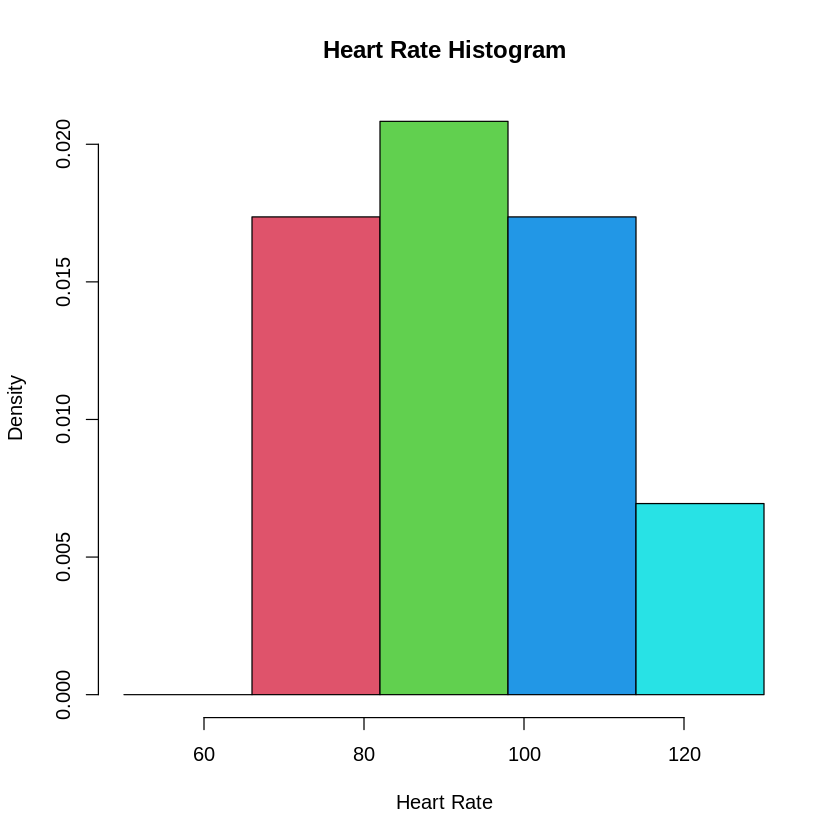

In [ ]:
hist(heart.rate$hr,breaks, main="Heart Rate Histogram", xlab="Heart Rate", col=DesiredColors, freq = 0 )

# Problem 3 (35 points)

In this problem we will explore how to create a random array and also how to efficiently implement a geometric mean calculation.

a. The function ```runif``` can be used to create an array of random numbers between any two numbers specified by the user. Explore the usage of ```runif```. Create an array called ```randomValues``` and assign it to 700 random numbers between 10 and 400. Please set the seed value as 1000. You should do this using a command similar to this one: 
```r
set.seed(1000)
randomValues <- runif(700,1,50)
```

In [ ]:
set.seed(1000)
randomValues = runif(700,10,400)
print(randomValues)

  [1] 137.87270 305.95013  54.43519 279.39451 211.39694  36.41780 298.09879
  [8] 237.57867  94.15085 109.88773 146.47561 304.63002 133.66286 347.66700
 [15] 308.02269  38.42510 202.12092 257.71319  43.09457 237.72920  73.54838
 [22] 323.93024 122.95267  37.99165 223.83912 273.85578 186.23947 331.40876
 [29]  45.39949  57.66278 231.33184  29.38687 229.03194 386.80977 208.87868
 [36] 283.36540  17.93627 315.59192 237.91468 133.74420 398.52122 217.10820
 [43]  52.86423 256.95251 321.19238 288.06601 284.10564 229.50477 110.96032
 [50] 207.70560 293.45172 276.00180  24.51755 212.06051 256.15460 277.27560
 [57] 287.91125 224.02717 356.68848 198.61988 172.34400  19.05023 305.56469
 [64] 383.50977 103.58374 362.48188 135.15556 370.85591  25.08569 315.89106
 [71] 234.27601 287.80347 149.27490 173.83611 343.40373  66.42230  99.37176
 [78]  86.30929  44.62087  73.31574 127.96374  78.81642 369.18458  34.61784
 [85] 233.69146  61.53781 198.20432 116.76174 171.66578 180.11784 372.06521
 [92] 331.69

b. R has a function called ```prod```, which can be used to multiple all of the numbers in an array together. Trying using ```prod(randomValues)```. What happens?

In [ ]:
prod(randomValues)
print("R cant produce the multiplication of all numbers in an array together it just shows Inf implies infinity ")

[1] Inf

[1] "R cant produce the multiplication of all numbers in an array together it just shows Inf implies infinity "


c. Suppose you want to calculate the geometric mean of the numbers in ```randomValues```. How can you implement it in R? What is the geometric mean? Don’t use any packages beyond what is available in the base packages in R.
Hint: In the slides for Lecture 2, I have shown you another way to calculate geometric mean with the ```log()``` and ```exp()``` functions.

In [ ]:
print("The Geomentric mean is")
exp(mean(log(randomValues)))

[1] "The Geomentric mean is"


[1] 162.4393